<a href="https://colab.research.google.com/github/SiberianHedgehog/HonGong/blob/main/Ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7-1 인공 신경망

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

#패션 MNIST


In [ ]:
from tensorflow import keras

(x_train, y_train) ,(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


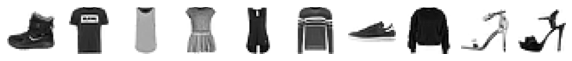

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
print([y_train[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np

print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


#로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
train_scaled = x_train / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, y_train, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


#인공신경망

##텐서플로우와 케라스

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
train_scaled, val_scaled, y_train, val_target = train_test_split(
    train_scaled, y_train, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, y_train.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
model = keras.Sequential(keras.layers.Dense(10, activation='softmax', input_shape=(784,)))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(y_train[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6058 - accuracy: 0.7932
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4785 - accuracy: 0.8385
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4564 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4435 - accuracy: 0.8539
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4358 - accuracy: 0.8551


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.4579 - accuracy: 0.8483


[0.4579426348209381, 0.8483333587646484]

# 7-2 심층 신경망

In [ ]:
from keras.layers import Dense

model2 = keras.Sequential()
model2.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model2.fit(train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5647 - accuracy: 0.8079
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4084 - accuracy: 0.8521
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3742 - accuracy: 0.8657
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3496 - accuracy: 0.8741
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3315 - accuracy: 0.8792


## 렐루 활성화 함수

In [ ]:
from keras.layers import Flatten

model3 = keras.Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

train_scaled = x_train / 255.0

train_scaled, val_scaled, y_train, val_target = train_test_split(
    train_scaled, y_train, test_size=0.2, random_state=42)

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model3.fit(train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5381 - accuracy: 0.8097
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3952 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3570 - accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3355 - accuracy: 0.8793
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3192 - accuracy: 0.8850


In [ ]:
model3.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3847 - accuracy: 0.8683


[0.3846753239631653, 0.8683333396911621]

#7-3 신경망 모델 훈련

## 손실 곡선

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


epochs=5

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


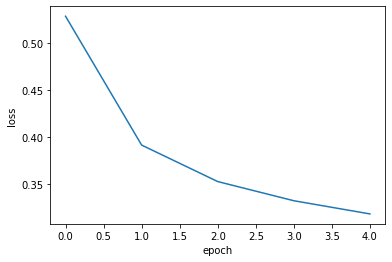

In [ ]:
import matplotlib.pyplot as pyplot

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

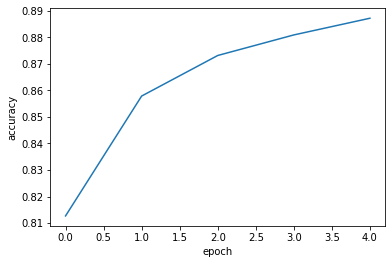

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

epochs=20

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

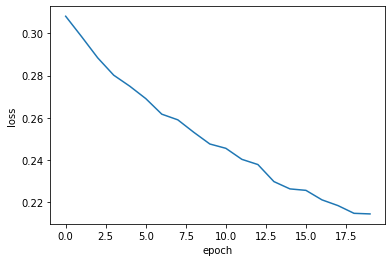

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

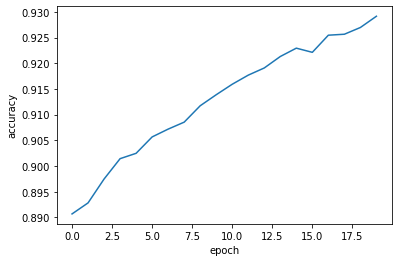

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 검증 손실

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


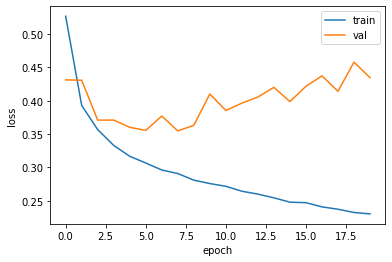

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

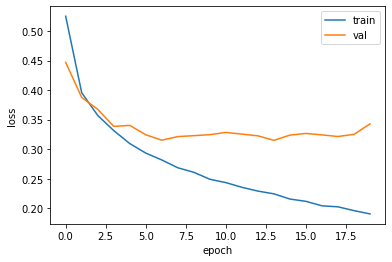

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##모델 저장과 복원

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
model.save_weights('model-weights.h5')

In [ ]:
model.save('model-whole.h5')

In [ ]:
!ls -al * h5

ls: cannot access 'h5': No such file or directory
-rw-r--r-- 1 root root 333272 Jan 14 03:38 model-weights.h5
-rw-r--r-- 1 root root 982568 Jan 14 03:38 model-whole.h5

sample_data:
total 55512
drwxr-xr-x 1 root root     4096 Jan  9 14:36 .
drwxr-xr-x 1 root root     4096 Jan 14 03:38 ..
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Jan  9 14:36 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Jan  9 14:36 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Jan  9 14:36 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Jan  9 14:36 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.879


In [ ]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8790


[0.3368217945098877, 0.8790000081062317]

##콜백

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3162 - accuracy: 0.8827


[0.31617891788482666, 0.8827499747276306]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

8


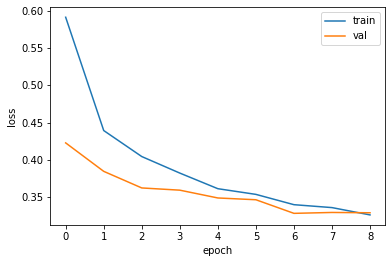

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8798


[0.327799528837204, 0.8797500133514404]